In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db=mysql.connector.connect(host="localhost",
                           username="root",
                           password="1234",
                           database="ecommerce")
cur=db.cursor()


 # list all unique cities where customers are located.



In [2]:
query="""select distinct(customer_city)from customers"""

cur.execute(query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the no. of orders placed in 2017

In [3]:
query="""select count(order_id) from orders where year(order_purchase_timestamp)= 2017"""

cur.execute(query)
data=cur.fetchall()
"Total orders placed in 2017",data[0][0]

('Total orders placed in 2017', 135303)

# Find total sale per category.

In [4]:
query="""select upper(products.product_category) as Category,
round(sum(payments.payment_value),2) as Sales
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by Category
"""
cur.execute(query)
data=cur.fetchall()
data

[('PERFUMERY', 6080863.92),
 ('FURNITURE DECORATION', 17162116.7),
 ('TELEPHONY', 5842584.61),
 ('BED TABLE BATH', 20550644.05),
 ('AUTOMOTIVE', 10227531.97),
 ('COMPUTER ACCESSORIES', 19023965.36),
 ('HOUSEWARES', 13137097.56),
 ('BABIES', 6478147.92),
 ('TOYS', 7428452.27),
 ('FURNITURE OFFICE', 7761917.85),
 ('COOL STUFF', 9356376.0),
 ('HEALTH BEAUTY', 19888477.43),
 ('PET SHOP', 3735227.64),
 ('GENERAL INTEREST BOOKS', 776337.12),
 ('STATIONARY STORE', 3809280.84),
 ('WATCHES PRESENT', 17150600.14),
 ('PCS', 3349458.59),
 ('CLIMATIZATION', 1094047.91),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 2897707.56),
 ('SPORT LEISURE', 16705530.71),
 ('BAGS ACCESSORIES', 2245815.48),
 ('ELECTRONICS', 3118285.2),
 ('CASA CONSTRUCAO', 1639743.48),
 ('GAMES CONSOLES', 2345764.55),
 ('FASHION BAGS AND ACCESSORIES', 2617899.36),
 ('HOME APPLIANCES', 1146387.24),
 ('GARDEN TOOLS', 10059369.01),
 ('AGRO INDUSTRIA E COMERCIO', 1424767.33),
 (None, 3033620.52),
 ('AUDIO', 723895.44),
 ('TECHNICAL BOOKS', 

In [5]:
df=pd.DataFrame(data,columns=["Category","Sales"])
print(df)

                       Category        Sales
0                     PERFUMERY   6080863.92
1          FURNITURE DECORATION  17162116.70
2                     TELEPHONY   5842584.61
3                BED TABLE BATH  20550644.05
4                    AUTOMOTIVE  10227531.97
..                          ...          ...
69               CDS MUSIC DVDS     14393.16
70                   LA CUISINE     34962.36
71  FASHION CHILDREN'S CLOTHING      9428.04
72                     PC GAMER     26093.16
73       INSURANCE AND SERVICES      3894.12

[74 rows x 2 columns]


# Calculate the % of orders that were paid in installments.

In [6]:
query="""select (sum(case when payment_installments>=1 then 1 else 0 end))/count(*)*100
from payments
"""
cur.execute(query)
data=cur.fetchall()
"Calculate the % of orders that were paid in installments is ",data[0][0]

('Calculate the % of orders that were paid in installments is ',
 Decimal('99.9981'))

# Count the number of customers from each state

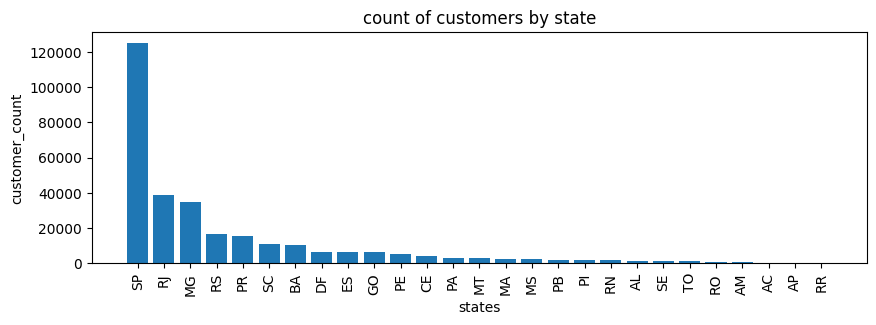

In [7]:
query="""select customer_state, count(customer_id) from customers
group by customer_state
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["state","customer_count"])
df=df.sort_values(by="customer_count",ascending=False)

plt.figure(figsize=(10,3))
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation=90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("count of customers by state")
plt.show()

# calculate the number of orders per month in 2018.

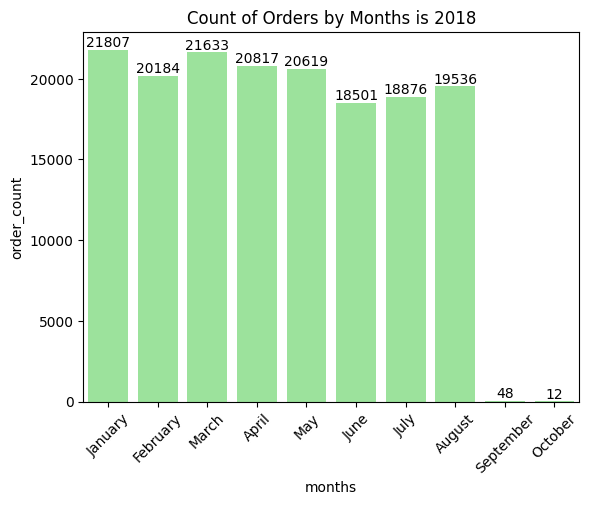

In [8]:
query="""select monthname(order_purchase_timestamp) as months,count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["months","order_count"])
o= ["January","February","March","April","May","June","July","August","September","October"]
ax=sns.barplot(x=df["months"],y=df["order_count"],data=df, order=o, color="lightgreen")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months is 2018")
plt.show()

# find the avg number of products per order, grouped by customer city.

In [9]:
query="""with count_per_order as (
select orders.order_id, orders.customer_id,count(order_items.order_id) as oc 
from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city,round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["customer city","Average orders/product"])
df.head(10)

,customer city,Average orders/product
0,padre carvalho,42.00
1,celso ramos,39.00
2,datas,36.00
3,candido godoi,36.00
4,matias olimpio,30.00
5,cidelandia,24.00
6,curralinho,24.00
7,picarra,24.00
8,morro de sao paulo,24.00
9,teixeira soares,24.00


# calculate the % of total revenue contributed by each product category.

In [10]:
query="""select upper(products.product_category) Category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100 ,2)as Sales_percentage
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by Category order by Sales_percentage desc
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["category","percentage distribution"])
df.head(10)


,category,percentage distribution
0,BED TABLE BATH,64.19
1,HEALTH BEAUTY,62.12
2,COMPUTER ACCESSORIES,59.42
3,FURNITURE DECORATION,53.60
4,WATCHES PRESENT,53.57
5,SPORT LEISURE,52.18
6,HOUSEWARES,41.03
7,AUTOMOTIVE,31.94
8,GARDEN TOOLS,31.42
9,COOL STUFF,29.22


# Identify the corelation between product price and thr number of times a product has been purchased.

In [11]:

import numpy as np
query="""SELECT products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id=order_items.product_id
group by products.product_category
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Category","Order_Count","Price"])

arr1=df["Order_Count"]
arr2=df["Price"]
a=np.corrcoef([arr1,arr2])
print("The corelation between product price and thr number of times a product has been purchased.",a[0][-1])

The corelation between product price and thr number of times a product has been purchased. -0.10631514167157569


# Calculate the total revenue generated by each seller, and rank them by revenue.

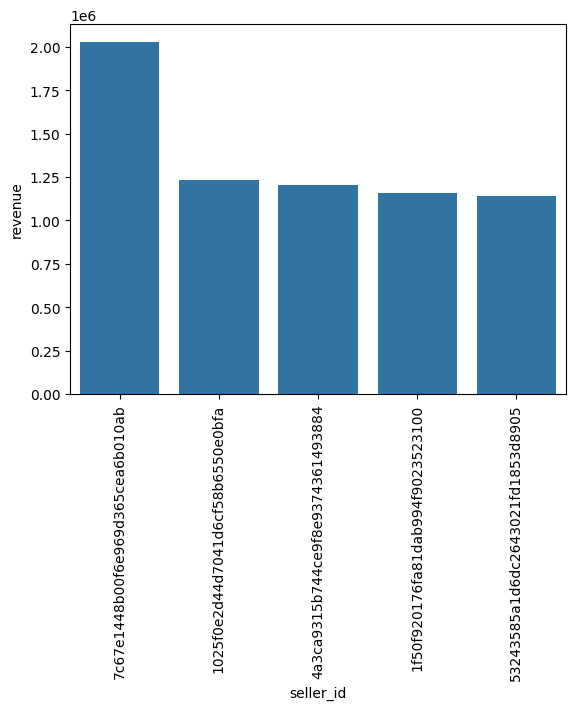

In [12]:
query="""select *,dense_rank() over(order by revenue desc) as rn from 
(select order_items.seller_id,sum(payments.payment_value) revenue
from order_items join payments
on order_items.order_id=payments.order_id
group by order_items.seller_id)as a 
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["seller_id","revenue","rank"])
df=df.head()
sns.barplot(x="seller_id",y="revenue",data=df)
plt.xticks(rotation=90)
plt.show()

# calculate the moving average of order values for each customer over thier order history.

In [19]:
query=""" select customer_id,order_purchase_timestamp,payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id,orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id=orders.order_id) as a
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df.head()

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998


# Calculate the cumulative sales per month for each year.

In [21]:
query="""
select years,months,payment,sum(payment)
over(order by years,months) cumulative_sales from 

(select year(orders.order_purchase_timestamp)as years,
month(orders.order_purchase_timestamp)as months,
round(sum(payments.payment_value),2)as payment from orders join payments
on orders.order_id=payments.order_id
group by years,months order by years,months) as a
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,1513.44,1513.44
1,2016,10,354542.88,356056.32
2,2016,12,117.72,356174.04
3,2017,1,830928.24,1187102.28
4,2017,2,1751448.06,2938550.34
5,2017,3,2699181.60,5637731.94
6,2017,4,2506728.18,8144460.12
7,2017,5,3557512.92,11701973.04
8,2017,6,3067658.28,14769631.32
9,2017,7,3554297.52,18323928.84


# Calculate the year over year growth rate of total sales.

In [28]:
query="""with a as
(select year(orders.order_purchase_timestamp)as years,

round(sum(payments.payment_value),2)as payment from orders join payments
on orders.order_id=payments.order_id
group by years order by years)
select years,((payment-lag(payment,1) over(order by years))/
lag(payment,1) over(order by years))*100
 from a
"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["years","YOY"])
df

,years,YOY
0,2016,NaN
1,2017,12112.703759
2,2018,20.000924


# Calculate the retention rate of customers,defined as the % of customers who make another purchase within 6 months of thier first purchase.

In [29]:
query="""
with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id=orders.customer_id
group by customers.customer_id),
b as 
(select a.customer_id,count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id=a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order,interval 6 month)
group by a.customer_id )

select 100*(count(distinct a.customer_id)/count(distinct(b.customer_id)))
from a left join b
on a.customer_id=b.customer_id;
"""
cur.execute(query)
data=cur.fetchall()
data

[(None,)]

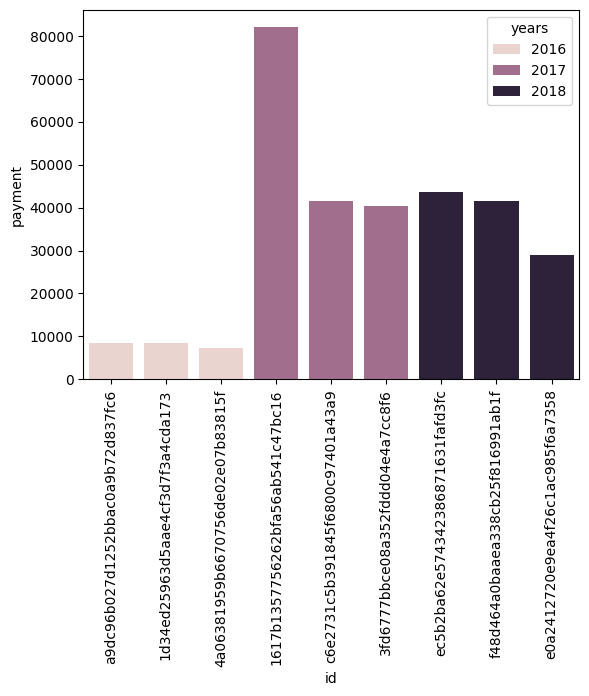

In [35]:
query="""
select years,customer_id,payment,d_rank
from

(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over ( partition by year(orders.order_purchase_timestamp) 
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id=orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank<=3
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["years","id","payment","rank"])
sns.barplot(x="id",y="payment",data=df,hue="years")
plt.xticks(rotation=90)
plt.show()